# MNIST MLP & CNN

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9131390147157717610
xla_global_id: -1
]
2.9.1
Num GPUs Available:  0


# Preprocessing
- One-hot labels
- Reshape and normalize data

In [20]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

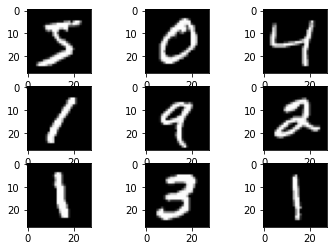

In [21]:
from matplotlib import pyplot
import numpy as np

# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [22]:
# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = X_train.shape[1]
input_size = image_size * image_size

# resize and normalize
X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float32') / 255
X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype('float32') / 255

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

# MLP Model

## Hyperparameters

In [24]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [29]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout


model = Sequential(name="MLP")
model.add(Dense(hidden_units, input_dim=input_size, activation = "relu"))
model.add(Dropout(dropout))
model.add(Dense(hidden_units, activation = "relu"))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable p

In [30]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [31]:
history = model.fit(
    x = X_train,
    y = y_train,
    validation_split = .1,
    epochs = 20,
    batch_size=batch_size
)

Epoch 1/20
422/422 [==============================] - 2s 3ms/step - loss: 0.4592 - accuracy: 0.8580 - val_loss: 0.1243 - val_accuracy: 0.9645
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2067 - accuracy: 0.9380 - val_loss: 0.0934 - val_accuracy: 0.9738
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.1613 - accuracy: 0.9522 - val_loss: 0.0815 - val_accuracy: 0.9750
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.1356 - accuracy: 0.9594 - val_loss: 0.0706 - val_accuracy: 0.9788
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.1186 - accuracy: 0.9636 - val_loss: 0.0728 - val_accuracy: 0.9783
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.1071 - accuracy: 0.9669 - val_loss: 0.0732 - val_accuracy: 0.9780
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0976 - accuracy: 0.9705 - val_loss: 0.0613 - val_accuracy: 0.9813
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


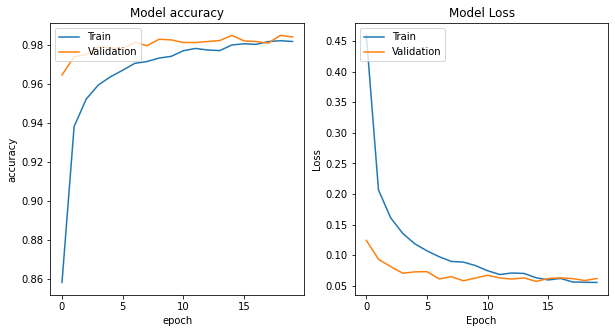

In [32]:
import matplotlib.pyplot as plt

def plot_history(history):

    plt.figure(figsize=(10, 5))

    # summarize history for mean_squared_error
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # summarize history for loss
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

print(history.history.keys())
plot_history(history)

## Model Evaluation

In [33]:
_, acc = model.evaluate(
    X_test,
    y_test,
    batch_size=batch_size,
    verbose=0
)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 98.4%


## Save Model

In [34]:
model.save('MLP_MNIST.h5')

## Load Model

In [35]:
reconstructed_model = tf.keras.models.load_model("MLP_MNIST.h5")
_, acc = reconstructed_model.evaluate(X_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 0s 1ms/step - loss: 0.0644 - accuracy: 0.9835

Test accuracy: 98.4%


# CNN Model

In [36]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = X_train.shape[1]
input_size = image_size * image_size
img_channels = 1

# resize and normalize
X_train = np.reshape(X_train, [-1, image_size, image_size, img_channels])
X_train = X_train.astype('float32') / 255
X_test = np.reshape(X_test, [-1, image_size, image_size, img_channels])
X_test = X_test.astype('float32') / 255


In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

## Model

In [38]:
from keras.layers.convolutional import Conv2D, MaxPooling2D

num_labels = 10
input_size = 28 * 28

model = Sequential(name = "CNN")
model.add(Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation = "softmax"))
model.summary()


Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)              0       

In [39]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
    # train_generator,
    x = X_train,
    y = y_train,
    validation_split = .1,
    epochs = 10,
    verbose = True
)

Epoch 1/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2253 - accuracy: 0.9294 - val_loss: 0.0608 - val_accuracy: 0.9830
Epoch 2/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0815 - accuracy: 0.9753 - val_loss: 0.0451 - val_accuracy: 0.9877
Epoch 3/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0661 - accuracy: 0.9793 - val_loss: 0.0450 - val_accuracy: 0.9865
Epoch 4/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0565 - accuracy: 0.9822 - val_loss: 0.0402 - val_accuracy: 0.9880
Epoch 5/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0491 - accuracy: 0.9843 - val_loss: 0.0324 - val_accuracy: 0.9910
Epoch 6/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0445 - accuracy: 0.9862 - val_loss: 0.0299 - val_accuracy: 0.9920
Epoch 7/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0414 - accuracy: 0.9865 - val_loss: 0.0295 - val_ac

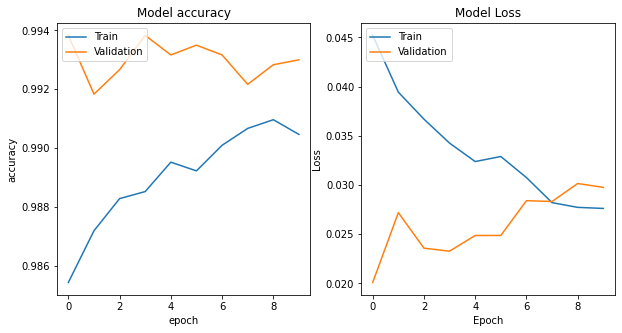

In [54]:
plot_history(history)

In [55]:
_, acc = model.evaluate(
    X_test,
    y_test,
    batch_size=batch_size,
    verbose=0
)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 99.2%


# Data Augmentation

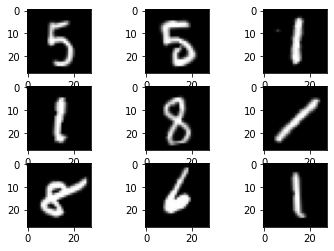

In [56]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
	featurewise_center=True, 
	featurewise_std_normalization=True,
	rotation_range=10,
	horizontal_flip=False,
	validation_split = 0.1
	# vertical_flip=True
)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [61]:
datagen.fit(X_train)
train_generator = datagen.flow(X_train, y_train, batch_size=128, subset='training')
validation_generator = datagen.flow(X_train, y_train, batch_size=128, subset='validation')

In [62]:
model = Sequential(name = "CNN_DA")
model.add(Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation = "softmax"))
model.summary()

Model: "CNN_DA"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_6 (Dropout)         (None, 1600)              0    

In [63]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs = 10,
    verbose = True,
    validation_data = validation_generator
)

Epoch 1/10
375/375 [==============================] - 12s 31ms/step - loss: 0.3598 - accuracy: 0.8887 - val_loss: 0.1048 - val_accuracy: 0.9709
Epoch 2/10
375/375 [==============================] - 11s 30ms/step - loss: 0.1143 - accuracy: 0.9646 - val_loss: 0.0745 - val_accuracy: 0.9789
Epoch 3/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0882 - accuracy: 0.9728 - val_loss: 0.0611 - val_accuracy: 0.9822
Epoch 4/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0757 - accuracy: 0.9773 - val_loss: 0.0546 - val_accuracy: 0.9849
Epoch 5/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0674 - accuracy: 0.9792 - val_loss: 0.0501 - val_accuracy: 0.9847
Epoch 6/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0592 - accuracy: 0.9815 - val_loss: 0.0464 - val_accuracy: 0.9868
Epoch 7/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0561 - accuracy: 0.9824 - val_loss: 0.0461 - val_accuracy:

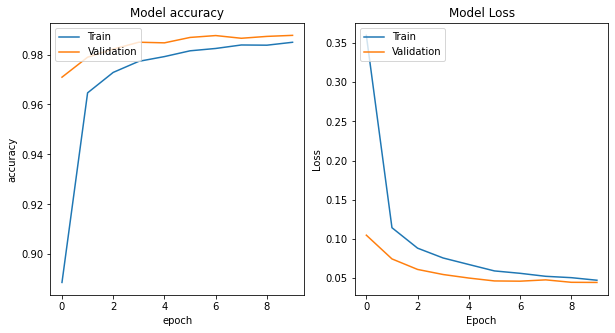

In [64]:
plot_history(history)

In [65]:
_, acc = model.evaluate(
    X_test,
    y_test,
    batch_size=batch_size,
    verbose=0
)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 98.8%


# Serializing Model

In [66]:
model.save('CNN_MNIST.h5')

## Load Model

In [67]:
reconstructed_model = tf.keras.models.load_model("CNN_MNIST.h5")

In [68]:
reconstructed_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1616 - accuracy: 0.9876


[0.16159658133983612, 0.9876000285148621]